In [148]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!which python
print(tf.__version__)


/home/lol/Desktop/Labs/AI/.venv/bin/python
2.2.0


In [149]:
import glob
import cv2

def read_glob(path):
    arr = []
    files = glob.glob(path)
    for filepath in sorted(files):
        img = cv2.imread(filepath,0)
        # print(img.shape)
        img = img.reshape(32,32,1)
        # print(img.shape)
        img = img / 255
        arr.append(img)
    return np.array(arr)

happy = read_glob("./crop/happy/linq*/*")
normal = read_glob("./crop/normal/linq*/*")
sad = read_glob("./crop/sad/linq*/*")

# print(happy, normal,sad,sep='\n')

# happy = gen.flow_from_directory(
#     "./crop/happy/linq_100x140/",
#     target_size=(32,32),
# )


my_happy = read_glob("./crop/happy/my*/*")
my_normal = read_glob("./crop/normal/my*/*")
my_sad = read_glob("./crop/sad/my*/*")

my = np.concatenate([my_happy,my_normal,my_sad])
my_res = np.concatenate([
    np.array([0]*len(my_happy)),
    np.array([1]*len(my_normal)),
    np.array([2]*len(my_sad))
])
kk = keras.utils.to_categorical(my_res,
    num_classes=3
)

images = np.concatenate([happy,normal,sad])
images = images.reshape(len(images), 32, 32, 1)
images_res = np.concatenate([
    np.array([0]*len(happy)),
    np.array([1]*len(normal)),
    np.array([2]*len(sad))
])
k = keras.utils.to_categorical(images_res,
    num_classes=3
)


def plot_history(history):
    fig, axis = plt.subplots(2,figsize=(16,10))
    keys = ('loss','accuracy')
    cols = ('red', 'blue')
    loc = ("upper right", "lower right")

    for idx, key in enumerate(keys):
        axis[idx].plot(history.epoch, history.history["val_"+key],
                    '--', label="val_"+key, color=cols[idx])
        axis[idx].plot(history.epoch, history.history[key], color=cols[idx], label=key)
        axis[idx].legend(loc=loc[idx])
        axis[idx].set(ylabel=key)

    plt.xlabel('Epochs')
    plt.legend()
    fig.show()

    # plt.xlim([0,max(history.epoch)])
# plot_history([('test',test)])

In [179]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,1),name="input"))
model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*3, activation='relu', name="process", input_dim=32*32))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    horizontal_flip=True,
    fill_mode="nearest")

history = model.fit(aug.flow(images, k), epochs=65, validation_data=(my, kk))

test = model.evaluate(my,kk)

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat (Flatten)               (None, 1024)              0         
_________________________________________________________________
process (Dense)              (None, 96)                98400     
_________________________________________________________________
categorize (Dense)           (None, 3)                 291       
Total params: 98,691
Trainable params: 98,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/65
9/9 [==============================] - 0s 19ms/step - loss: 2.1488 - accuracy: 0.3422 - val_loss: 1.6478 - val_accuracy: 0.3510
Epoch 2/65
9/9 [==============================] - 0s 10ms/step - loss: 1.4053 - accuracy: 0.3726 - val_loss: 1.1113 - val_accuracy: 0.3907
Epoch 3/65
9/9 [==============================] - 0s 11ms/step - loss: 1.1986 - accuracy: 0.3232 - va

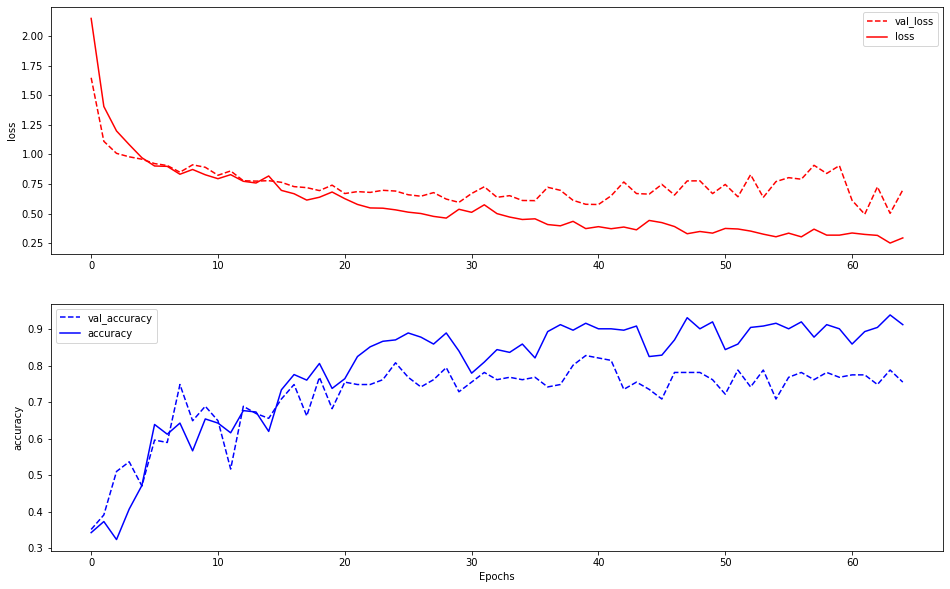

In [180]:
plot_history(history)

In [169]:
# tfrand.set_seed(1)
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,1),name="input"))
model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*2, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(32, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

history = model.fit(aug.flow(images, k), epochs=50, validation_data=(my, kk))
test = model.evaluate(my,kk)

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flat (Flatten)               (None, 1024)              0         
_________________________________________________________________
dense_181 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense_182 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_183 (Dense)            (None, 16)                528       
_________________________________________________________________
categorize (Dense)           (None, 3)                 51        
Total params: 68,259
Trainable params: 68,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
9/9 [==============================] - 0s 20ms/step - loss: 1.1477 - accuracy: 0.4335 - val_loss: 1.0696

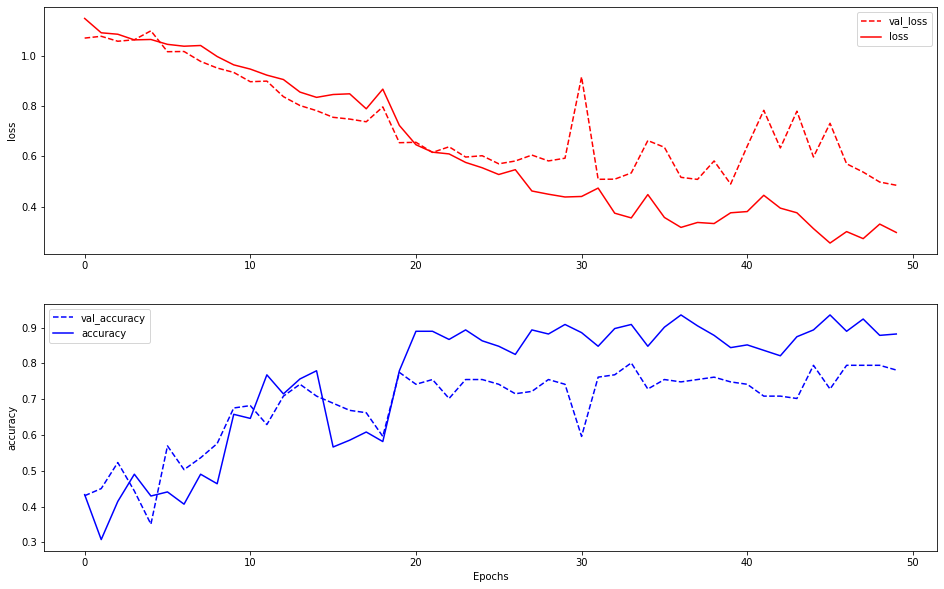

In [170]:
plot_history(history)

In [158]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    horizontal_flip=True)

history = model.fit(aug.flow(images, k), epochs=60, validation_data=(my, kk))

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_161 (Dense)            (None, 32)                230432    
_________________________________________________________________
dropout_40 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_162 (Dense)            (None, 3)                 99        
Total params: 230,851
Trainable params: 230,851
Non-trainable params: 0
_______________________________________________

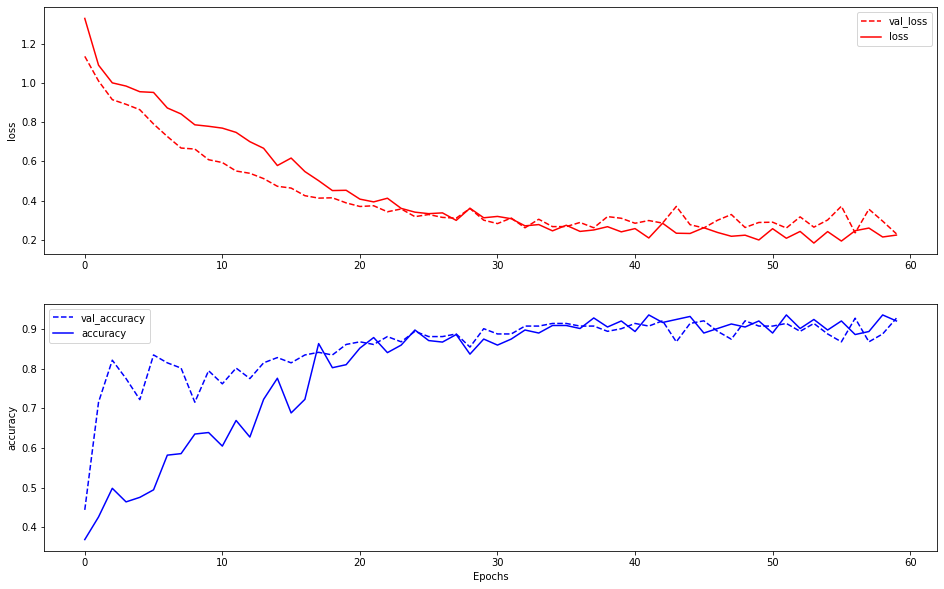

In [159]:
plot_history(history)